# Problem statement
Vehicle loan default occurs when a customer fails to repay a loan borrowed for its purchase during the agreed period. This leads to financial institutions developing strategies that will help them identify borrowers who are likely or not likely to default and take the required steps to minimize the problem. 

# Objective
The objective of this case study is to determine the probability of the borrower defaulting on their loan during the first Equated Monthly Installment(EMI) on the due date

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the dataset
data=pd.read_csv('/Users/eunicewanjira/Desktop/Superfluid labs/ds_challenge/data.csv')

In [3]:
#view the first five rows
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


# Dataset Overview
The dataset contains 233154 rows and 41 columns of which one column is the target variable

In [4]:
#to view the total number of rows and columns
#The dataset contains 233154 rows and 41 columns
data.shape

(233154, 41)

In [5]:
data.info()
#The dataset contains 1 float, 34 ints and 6 objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

The datatypes of the vehicle loan dataset are 1 float, 34 ints and 6 objects

In [6]:
data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [7]:
data['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

## Checking for class distribution
78.3% of the borrowers did not default while 21.7% of the borrowers defaulted on their loans

In [8]:
#Checking for class imbalance
count_no_sub = len(data[data['loan_default']==0])
count_sub = len(data[data['loan_default']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no loan defaults is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of loan defaults", pct_of_sub*100)

percentage of no loan defaults is 78.29288796246257
percentage of loan defaults 21.70711203753742


## Checking for missing values
The employment type feature contains 7661 missing values which constitues to 3.3% of the total values

In [9]:
#Check for the total number of missing values in each column
print (data.isnull().sum())

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [10]:
#checking for missing data
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Employment.Type,7661,3.3
PERFORM_CNS.SCORE,0,0.0
Driving_flag,0,0.0
VoterID_flag,0,0.0
PAN_flag,0,0.0
Aadhar_flag,0,0.0
MobileNo_Avl_Flag,0,0.0
Employee_code_ID,0,0.0
State_ID,0,0.0
DisbursalDate,0,0.0


In [11]:
#check categorical features
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH'],
      dtype='object')

## Feature Engineering


Date of Birth was object data type. It was first converted to date type. The date of birth feature was used to calculate the age of borrowers. The Age column was created then the Date of Birth column was deleted

In [12]:
data.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [13]:
def calculateAge(birthDate):
    if int(birthDate[-2:])<19:
        year=int('20'+birthDate[-2:])
    else:
        year=int('19'+birthDate[-2:])
    return pd.to_datetime('today').year-year


In [14]:
data['age']=data['Date.of.Birth'].apply(calculateAge)
del data['Date.of.Birth']

In [15]:
print (data['age'])

0         36
1         35
2         35
3         27
4         43
          ..
233149    32
233150    32
233151    44
233152    26
233153    36
Name: age, Length: 233154, dtype: int64


In [16]:
data.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,DisbursalDate,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,03-08-18,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,36
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,26-09-18,...,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,35
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,01-08-18,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,35
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,26-10-18,...,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,27
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,26-09-18,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,43
5,518279,54513,61900,89.66,67,22807,45,1501,Self employed,19-09-18,...,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0,30
6,529269,46349,61500,76.42,67,22807,45,1502,Salaried,23-09-18,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,32
7,510278,43894,61900,71.89,67,22807,45,1501,Salaried,16-09-18,...,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0,31
8,490213,53713,61973,89.56,67,22807,45,1497,Self employed,05-09-18,...,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0,29
9,510980,52603,61300,86.95,67,22807,45,1492,Salaried,16-09-18,...,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0,52


In [17]:
#Calculating Age
#from datetime import date 
#def calculateAge(birthDate): 
  #  today=date.today() 
  #  age=today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
   # return age 
#data['age']=data['Date.of.Birth'].apply(calculateAge)
#print(data['age'])
#del data['Date.of.Birth']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Employment.Type                      225493 non-null  object 
 9   DisbursalDate                        233154 non-null  object 
 10  State_ID                             233154 non-null  int64  
 11  Employee_code

The AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH contained a mixture of years and months therefore they were converted to months by createing a funtion

In [19]:
#converting years and months into months
def col_function(column):
    year=int(column.split()[0].replace('yrs',''))
    month=int(column.split()[1].replace('mon',''))
    return year*12+month

In [20]:
data['AVERAGE.ACCT.AGE']=data['AVERAGE.ACCT.AGE'].apply(col_function)
data['CREDIT.HISTORY.LENGTH']=data['CREDIT.HISTORY.LENGTH'].apply(col_function)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Employment.Type                      225493 non-null  object 
 9   DisbursalDate                        233154 non-null  object 
 10  State_ID                             233154 non-null  int64  
 11  Employee_code

In [22]:
#view the rows with null values
data['Employment.Type'].index[data['Employment.Type'].isnull()]

Int64Index([    87,     88,     91,     99,    125,    813,    850,    874,
              1249,   1275,
            ...
            231699, 231702, 231713, 231717, 231721, 231722, 231737, 231756,
            231767, 232656],
           dtype='int64', length=7661)

In [23]:
data.iloc[87]

UniqueID                                                    525234
disbursed_amount                                             52428
asset_cost                                                   67405
ltv                                                           81.6
branch_id                                                       78
supplier_id                                                  17014
manufacturer_id                                                 45
Current_pincode_ID                                            2099
Employment.Type                                                NaN
DisbursalDate                                             21-09-18
State_ID                                                         4
Employee_code_ID                                              1646
MobileNo_Avl_Flag                                                1
Aadhar_flag                                                      1
PAN_flag                                                      

In [24]:

#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=2)
#imputer.fit_transform(data)

In [25]:
#new_empl=pd.get_dummies(data['Employment.Type'],dummy_na=True).iloc[:,1:]
#new_empl

In [26]:
#Missing values


## Handling Missing values
The number of observations for each category was counted. Self employed contained 127635 while Salaried contained 97858. The missing values were imputed using the most common observation which was Self Employed

In [27]:
data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [28]:
data['Employment.Type'] = data['Employment.Type'].fillna({"Employment.Type":"Self employed"})

In [29]:
#encoding employment type
data['Employment.Type']=pd.get_dummies(data['Employment.Type'],prefix='Employment type',dummy_na=True).iloc[:,1:]
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,DisbursalDate,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age
0,420825,50578,58400,89.55,67,22807,45,1441,0,03-08-18,...,0,0,0,0,0,0,0,0,0,36
1,537409,47145,65550,73.23,67,22807,45,1502,1,26-09-18,...,0,1991,0,0,1,23,23,0,1,35
2,417566,53278,61360,89.63,67,22807,45,1497,1,01-08-18,...,0,0,0,0,0,0,0,0,0,35
3,624493,57513,66113,88.48,67,22807,45,1501,1,26-10-18,...,0,31,0,0,0,8,15,1,1,27
4,539055,52378,60300,88.39,67,22807,45,1495,1,26-09-18,...,0,0,0,0,0,0,0,1,1,43


Disbursal Date was Categorical. It was first converted to Date type then changed to int

In [30]:
#convert date of birth to date type
data['DisbursalDate']=pd.to_datetime(data['DisbursalDate'])

In [31]:
#convert date to int
data['DisbursalDate']=data['DisbursalDate'].astype('int64')

In [32]:
data.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,DisbursalDate,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age
0,420825,50578,58400,89.55,67,22807,45,1441,0,1520467200000000000,...,0,0,0,0,0,0,0,0,0,36
1,537409,47145,65550,73.23,67,22807,45,1502,1,1537920000000000000,...,0,1991,0,0,1,23,23,0,1,35
2,417566,53278,61360,89.63,67,22807,45,1497,1,1515369600000000000,...,0,0,0,0,0,0,0,0,0,35
3,624493,57513,66113,88.48,67,22807,45,1501,1,1540512000000000000,...,0,31,0,0,0,8,15,1,1,27
4,539055,52378,60300,88.39,67,22807,45,1495,1,1537920000000000000,...,0,0,0,0,0,0,0,1,1,43
5,518279,54513,61900,89.66,67,22807,45,1501,1,1537315200000000000,...,0,1347,0,0,0,21,24,0,0,30
6,529269,46349,61500,76.42,67,22807,45,1502,0,1537660800000000000,...,0,0,0,0,0,0,0,0,0,32
7,510278,43894,61900,71.89,67,22807,45,1501,0,1537056000000000000,...,0,0,0,0,0,2,2,0,0,31
8,490213,53713,61973,89.56,67,22807,45,1497,1,1525824000000000000,...,0,0,0,0,0,56,56,1,0,29
9,510980,52603,61300,86.95,67,22807,45,1492,0,1537056000000000000,...,0,2608,0,0,0,19,19,0,0,52


PERFORM_CNS.SCORE.DESCRIPTION contained 20 categories where some of them were a repetition
The categories were reduced by grouping similar classes together. They were reduced to 7 categories and then encoded

In [33]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [34]:
#replace names
import string
perform_string=data['PERFORM_CNS.SCORE.DESCRIPTION']
data['PERFORM_CNS.SCORE.DESCRIPTION']=perform_string.replace({'C-Very Low Risk ':'Very Low Risk','A-Very Low Risk':'Very Low Risk','C-Very Low Risk':'Very Low Risk',
                                  'D-Very Low Risk':'Very Low Risk','B-Very Low Risk':'Very Low Risk','M-Very High Risk':'Very High Risk',
                                  'F-Low Risk':'Low Risk','K-High Risk':'High Risk','H-Medium Risk':'Medium Risk','E-Low Risk':'Low Risk',
                                  'I-Medium Risk':'Medium Risk','G-Low Risk':'Low Risk','Not Scored: Sufficient History Not Available':'No History',
                                  'J-High Risk':'High Risk','Not Scored: Not Enough Info available on the customer':'Not Scored',
                                  'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored','Not Scored: No Updates available in last 36 months':'Not Scored',
                                  'L-Very High Risk':'Very High Risk','Not Scored: Only a Guarantor':'Not Scored','Not Scored: More than 50 active Accounts found':'Not Scored',
                                                             'No Bureau History Available':'No History'})


In [35]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No History        120715
Very Low Risk      50728
Low Risk           18294
Medium Risk        12412
High Risk          12025
Very High Risk      9910
Not Scored          9070
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [36]:
data['New_PERFORM_CNS.SCORE.DESCRIPTION']=data['PERFORM_CNS.SCORE.DESCRIPTION'].map({'No History':1,'Very Low Risk':2,
                                                                                   'Low Risk':3,'Medium Risk':4,'High Risk':5,
                                                                                    'Very High Risk':6,'Not Scored':0})
del data['PERFORM_CNS.SCORE.DESCRIPTION']

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Employment.Type                      233154 non-null  uint8  
 9   DisbursalDate                        233154 non-null  int64  
 10  State_ID                             233154 non-null  int64  
 11  Employee_code

In [38]:
data['ltv']=data['ltv'].astype('int64')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   UniqueID                             233154 non-null  int64
 1   disbursed_amount                     233154 non-null  int64
 2   asset_cost                           233154 non-null  int64
 3   ltv                                  233154 non-null  int64
 4   branch_id                            233154 non-null  int64
 5   supplier_id                          233154 non-null  int64
 6   manufacturer_id                      233154 non-null  int64
 7   Current_pincode_ID                   233154 non-null  int64
 8   Employment.Type                      233154 non-null  uint8
 9   DisbursalDate                        233154 non-null  int64
 10  State_ID                             233154 non-null  int64
 11  Employee_code_ID                     23

In [40]:
data['Employment.Type']=data['Employment.Type'].astype('int64')

## Creating new features


In [41]:
data['Total Number of ACCTS']= data['PRI.NO.OF.ACCTS']+ data['SEC.NO.OF.ACCTS']
data['Total Number of Active ACCTS']= data['PRI.ACTIVE.ACCTS']+ data['SEC.ACTIVE.ACCTS']
data['Total Number of Overdue ACCTS']= data['PRI.OVERDUE.ACCTS']+ data['SEC.OVERDUE.ACCTS']
data['Total Current Balance']= data['PRI.CURRENT.BALANCE']+ data['SEC.CURRENT.BALANCE']
data['Total Current Balance']= data['PRI.CURRENT.BALANCE']+ data['SEC.CURRENT.BALANCE']
data['Total Sanctioned Amount']= data['PRI.SANCTIONED.AMOUNT']+ data['SEC.SANCTIONED.AMOUNT']
data['Total Disbursed Amount']= data['PRI.DISBURSED.AMOUNT']+ data['SEC.DISBURSED.AMOUNT']
data['Total Sanctioned and Disbursed Amount']= data['Total Sanctioned Amount']- data['Total Disbursed Amount']
data['Total Installment Amount']= data['PRIMARY.INSTAL.AMT']+ data['SEC.INSTAL.AMT']

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 49 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   UniqueID                               233154 non-null  int64
 1   disbursed_amount                       233154 non-null  int64
 2   asset_cost                             233154 non-null  int64
 3   ltv                                    233154 non-null  int64
 4   branch_id                              233154 non-null  int64
 5   supplier_id                            233154 non-null  int64
 6   manufacturer_id                        233154 non-null  int64
 7   Current_pincode_ID                     233154 non-null  int64
 8   Employment.Type                        233154 non-null  int64
 9   DisbursalDate                          233154 non-null  int64
 10  State_ID                               233154 non-null  int64
 11  Employee_code

# Data Visualization
What features would contribute to high default rate?

,loan_default
Employment.Type,
1,0.227657
0,0.204267


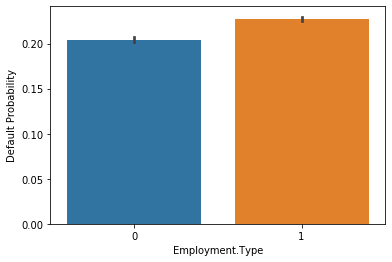

In [43]:
# Analyze the default Probability by employment type
gi = sns.barplot(x="Employment.Type",y="loan_default",data=data)
gi = gi.set_ylabel("Default Probability")
data[['Employment.Type', 'loan_default']].groupby(['Employment.Type']).mean().sort_values(by='loan_default', ascending=False)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 49 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   UniqueID                               233154 non-null  int64
 1   disbursed_amount                       233154 non-null  int64
 2   asset_cost                             233154 non-null  int64
 3   ltv                                    233154 non-null  int64
 4   branch_id                              233154 non-null  int64
 5   supplier_id                            233154 non-null  int64
 6   manufacturer_id                        233154 non-null  int64
 7   Current_pincode_ID                     233154 non-null  int64
 8   Employment.Type                        233154 non-null  int64
 9   DisbursalDate                          233154 non-null  int64
 10  State_ID                               233154 non-null  int64
 11  Employee_code

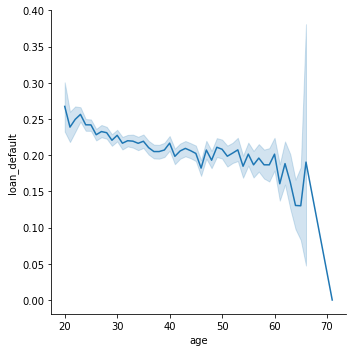

In [45]:
#Age vs loan default
age_vs_loan_default=sns.relplot(x='age',y='loan_default',kind="line",data=data)

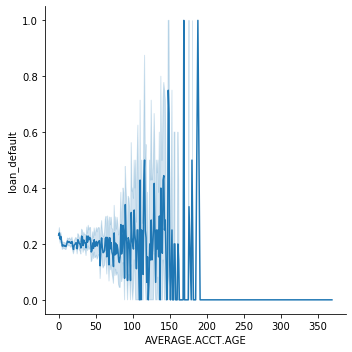

In [46]:
acctage_vs_loan_default=sns.relplot(x='AVERAGE.ACCT.AGE',y='loan_default',kind="line",data=data)

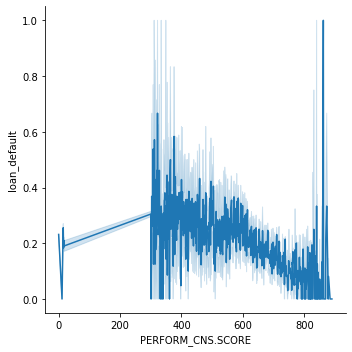

In [47]:
#performance score vs loan default
performancescore_vs_loan_default=sns.relplot(x='PERFORM_CNS.SCORE',y='loan_default',kind="line",data=data)

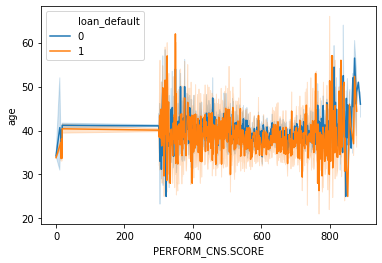

In [48]:
#performance score vs age vs loan default
performancescore_vs_age_vs_loan_default=sns.lineplot(x='PERFORM_CNS.SCORE',y='age',hue='loan_default',data=data)

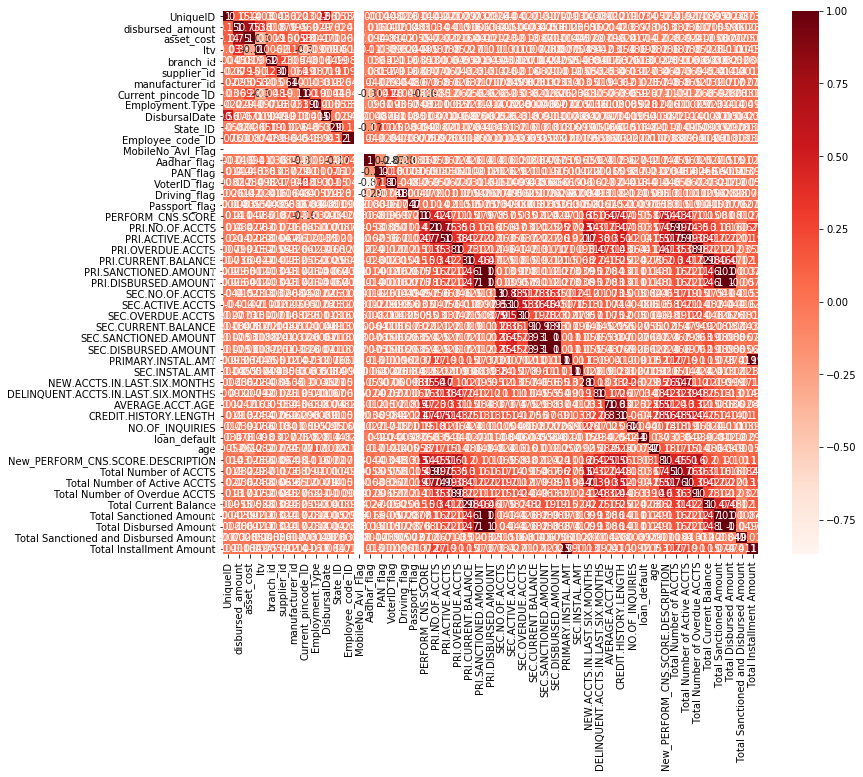

In [49]:
#using correlation
plt.figure(figsize=(12,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [50]:
#correlation with target variable
cor_target=abs(cor["loan_default"])
cor_target

UniqueID                                 0.033848
disbursed_amount                         0.077675
asset_cost                               0.014261
ltv                                      0.098033
branch_id                                0.030193
supplier_id                              0.027357
manufacturer_id                          0.025039
Current_pincode_ID                       0.028419
Employment.Type                          0.028241
DisbursalDate                            0.013908
State_ID                                 0.048075
Employee_code_ID                         0.020657
MobileNo_Avl_Flag                             NaN
Aadhar_flag                              0.041593
PAN_flag                                 0.002046
VoterID_flag                             0.043747
Driving_flag                             0.005821
Passport_flag                            0.007602
PERFORM_CNS.SCORE                        0.057929
PRI.NO.OF.ACCTS                          0.035456


In [115]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit(data)

#data = scaler.transform(data)

In [51]:
# Sampling
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix

In [59]:
   
#Assign data and target to separate variables
predictors = data.drop(['loan_default','UniqueID'], axis=1)
target = data["loan_default"]

#X = data.loan_default
#y = data.drop(['loan_default'],axis=1)

#X.values.reshape(1,-1)
# Create training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [53]:
X_train.shape,X_test.shape

((163207, 47), (69947, 47))

In [54]:
y_test.shape

(69947,)

## Model Building

In [60]:
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [61]:
from imblearn.over_sampling import ADASYN
X, y = ADASYN(random_state=42).fit_sample(predictors,target)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.30, random_state=3)

In [62]:
#scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
randomforest =RandomForestClassifier(n_estimators=100,random_state=1)
randomforest.fit(X_train, y_train)
randomforest.predict_proba(X_test)

array([[0.22, 0.78],
       [0.87, 0.13],
       [0.94, 0.06],
       ...,
       [0.9 , 0.1 ],
       [0.91, 0.09],
       [0.17, 0.83]])

In [64]:
y_pred = randomforest.predict(X_test)

In [65]:
acc_randomforest = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_randomforest)

93.16


In [66]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[53697,  1082],
       [ 3699, 11469]])

In [67]:
from sklearn.metrics import classification_report
matrix=classification_report(y_test, y_pred)
print('Classification report:\n',matrix)

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     54779
           1       0.91      0.76      0.83     15168

    accuracy                           0.93     69947
   macro avg       0.92      0.87      0.89     69947
weighted avg       0.93      0.93      0.93     69947



In [68]:
from sklearn.metrics import roc_auc_score
print('The AUC score of the random forest:{}'.format(roc_auc_score(y_test, y_pred)))

The AUC score of the random forest:0.8681896171665386


In [70]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
#def run_Logisticregression(X_train,X_test,y_test,y_train):# Logistic Regression : 
logi_reg = LogisticRegression()
    # Fit the regressor to the training data
logi_reg.fit(X_train, y_train)
logi_reg.predict_proba(X_test)

/Users/eunicewanjira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[0.88489458, 0.11510542],
       [0.77571385, 0.22428615],
       [0.81888876, 0.18111124],
       ...,
       [0.47204269, 0.52795731],
       [0.50785371, 0.49214629],
       [0.56797319, 0.43202681]])

In [71]:
y_pred = logi_reg.predict(X_test)

In [72]:
acc_logi_reg = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_logi_reg)

64.2


In [73]:
confusion_matrix(y_test, y_pred)

array([[39342, 15437],
       [ 9604,  5564]])

In [74]:
from sklearn.metrics import classification_report
matrix=classification_report(y_test, y_pred)
print('Classification report:\n',matrix)

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76     54779
           1       0.26      0.37      0.31     15168

    accuracy                           0.64     69947
   macro avg       0.53      0.54      0.53     69947
weighted avg       0.69      0.64      0.66     69947



In [75]:
from sklearn.metrics import roc_auc_score
print('The AUC score of the logistic regression:{}'.format(roc_auc_score(y_test, y_pred)))

The AUC score of the logistic regression:0.542509911614163


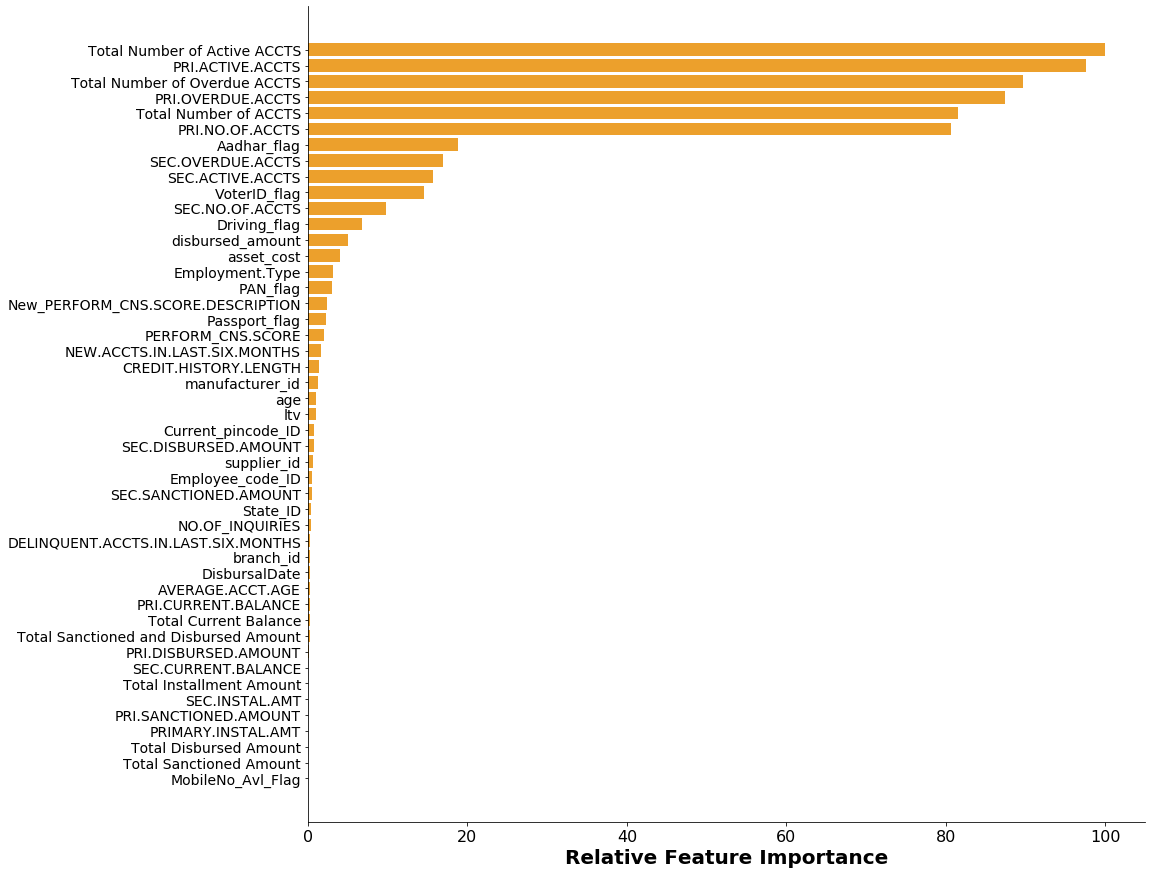

In [94]:
feature_importance = abs(logi_reg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(1,figsize=(15,15))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color='#eca02c')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(predictors.columns)[sorted_idx], fontsize=14)

featax.set_xlabel('Relative Feature Importance', fontsize=20, weight='bold')
featax.tick_params(axis="x", labelsize=16)


featax.spines['right'].set_visible(False)
featax.spines['top'].set_visible(False)
featax.spines['bottom'].set_visible(True)
featax.spines['left'].set_visible(True)

featax.patch.set_visible(False)

## XGBOOST classifier

In [80]:
from xgboost import XGBClassifier

In [81]:
model = XGBClassifier()
# fit the model with the training data
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
y_pred=model.predict(X_test)

In [83]:
acc_xgb = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_xgb)

78.6


In [84]:
confusion_matrix(y_test, y_pred)

array([[53429,  1350],
       [13617,  1551]])

In [85]:
from sklearn.metrics import classification_report
matrix=classification_report(y_test, y_pred)
print('Classification report:\n',matrix)

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88     54779
           1       0.53      0.10      0.17     15168

    accuracy                           0.79     69947
   macro avg       0.67      0.54      0.52     69947
weighted avg       0.74      0.79      0.72     69947



In [86]:
from sklearn.metrics import roc_auc_score
print('The AUC score of the xgboost:{}'.format(roc_auc_score(y_test, y_pred)))

The AUC score of the xgboost:0.5388051331431638


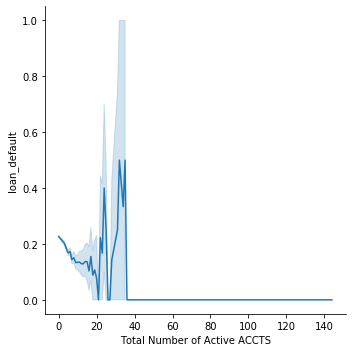

In [99]:
totalnoactiveaccts_vs_loan_default=sns.relplot(x='Total Number of Active ACCTS',y='loan_default',kind="line",data=data)

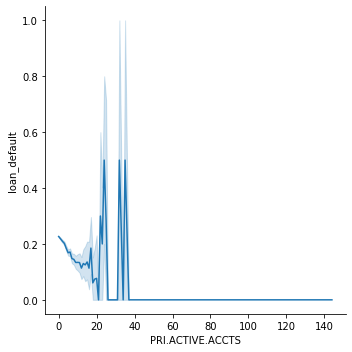

In [101]:
priactiveaccts_vs_loan_default=sns.relplot(x='PRI.ACTIVE.ACCTS',y='loan_default',kind="line",data=data)

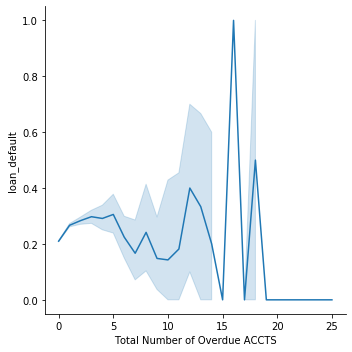

In [102]:
totaloverdueaccts_vs_loan_default=sns.relplot(x='Total Number of Overdue ACCTS',y='loan_default',kind="line",data=data)

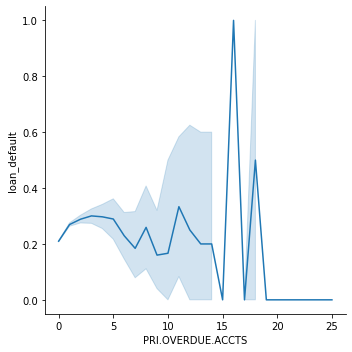

In [103]:
prioverdueaccts_vs_loan_default=sns.relplot(x='PRI.OVERDUE.ACCTS',y='loan_default',kind="line",data=data)

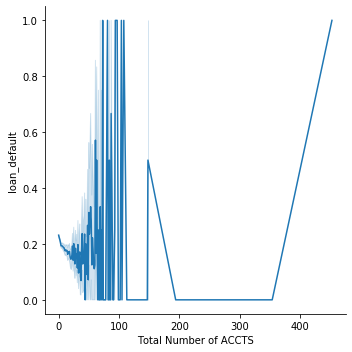

In [104]:
totalaccts_vs_loan_default=sns.relplot(x='Total Number of ACCTS',y='loan_default',kind="line",data=data)

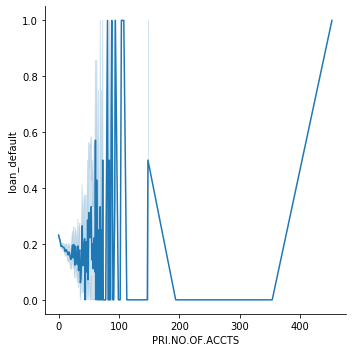

In [105]:
priaccts_vs_loan_default=sns.relplot(x='PRI.NO.OF.ACCTS',y='loan_default',kind="line",data=data)

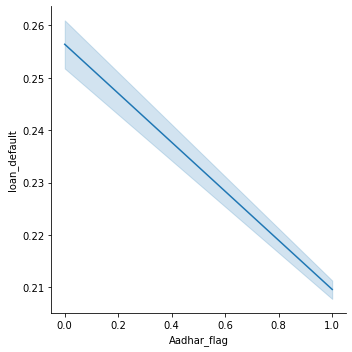

In [106]:
aadharflag_vs_loan_default=sns.relplot(x='Aadhar_flag',y='loan_default',kind="line",data=data)

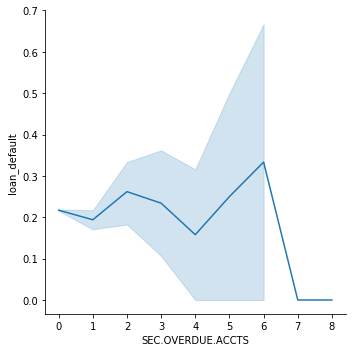

In [107]:
secoverdue_vs_loan_default=sns.relplot(x='SEC.OVERDUE.ACCTS',y='loan_default',kind="line",data=data)

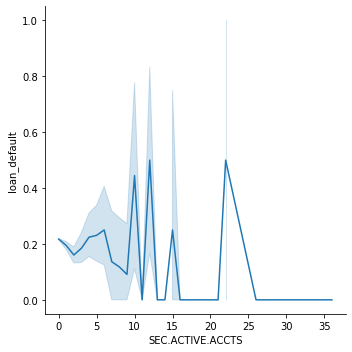

In [108]:
secactive_vs_loan_default=sns.relplot(x='SEC.ACTIVE.ACCTS',y='loan_default',kind="line",data=data)

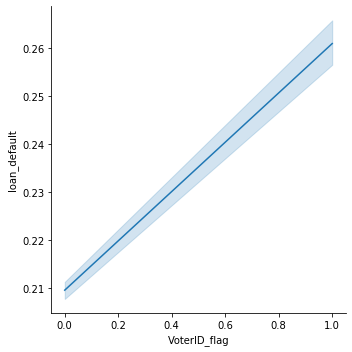

In [109]:
voterid_vs_loan_default=sns.relplot(x='VoterID_flag',y='loan_default',kind="line",data=data)